In [1]:
import numpy as np
import scipy
from scipy import linalg
from matplotlib import pyplot as plt

X = np.array([[0.0, 1.0], [1.0, 0.0]])
Z = np.array([[1.0, 0.0], [0.0, -1.0]])

H_p = Z#hard change
H_d = X#simple change
psi_0 = np.transpose(np.array([[1.0/np.sqrt(2), -1.0/np.sqrt(2)]]))#simple change
dt = 0.2
U_p = linalg.expm(-1j*H_p*dt)
comm = 1j*(H_d @ H_p - H_p @ H_d)
n_steps = 20
beta = [0]
cost_function = [float(np.real(np.conj(np.transpose(psi_0)) @ H_p @ psi_0))]#

U_d = linalg.expm(-1j*beta[0]*H_d*dt)
psi = U_d @ U_p @ psi_0
A = float(np.real(np.conj(np.transpose(psi)) @ comm @ psi))#
beta.append(-A)
cost_function.append(float(np.real(np.conj(np.transpose(psi)) @ H_p @ psi)))#

i = 1
while i < n_steps:
    U_d = linalg.expm(-1j*beta[i]*H_d*dt)
    psi = U_d @ U_p @ psi
    A = float((np.real(np.conj(np.transpose(psi)) @ comm @ psi)))#
    beta.append(-A)
    cost_function.append(float(np.real(np.conj(np.transpose(psi)) @ H_p @ psi)))#
    i = i+1

/var/folders/f7/khhs3y_55tz7ns9_2vs3hhfm0000gn/T/ipykernel_9425/1240558369.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  cost_function = [float(np.real(np.conj(np.transpose(psi_0)) @ H_p @ psi_0))]#
/var/folders/f7/khhs3y_55tz7ns9_2vs3hhfm0000gn/T/ipykernel_9425/1240558369.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  A = float(np.real(np.conj(np.transpose(psi)) @ comm @ psi))#
/var/folders/f7/khhs3y_55tz7ns9_2vs3hhfm0000gn/T/ipykernel_9425/1240558369.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before 

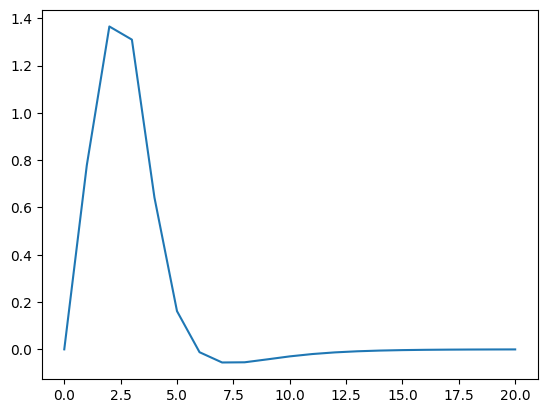

In [2]:
plt.plot(beta)
plt.show()

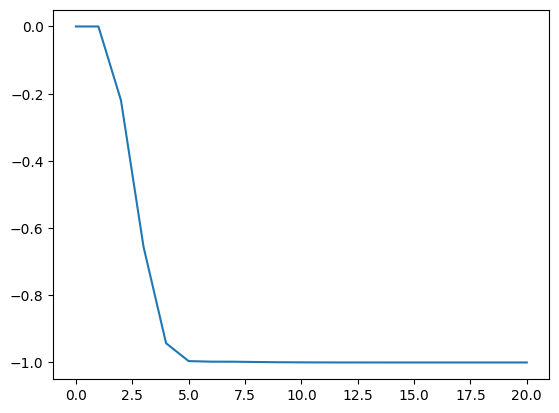

In [3]:
plt.plot(cost_function)
plt.show()